In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data_path = 'data/train/'

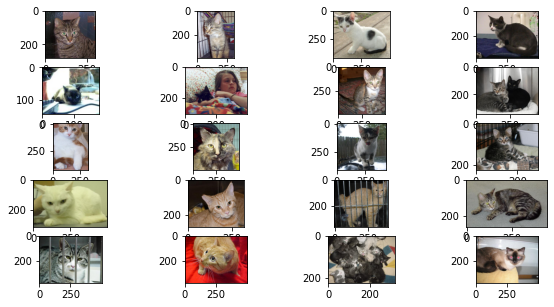

In [6]:
#sample cats images
plt.figure(figsize=(10,5))
for i in range(1,21):
    plt.subplot(5, 4, i)
    img = plt.imread(train_data_path+'cats/'+str(i)+'.jpg')
    plt.imshow(img)

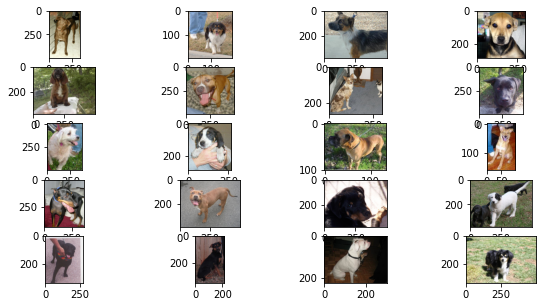

In [7]:
#sample dog images
plt.figure(figsize=(10,5))
for i in range(1,21):
    plt.subplot(5, 4, i)
    img = plt.imread(train_data_path+'dogs/'+str(i)+'.jpg')
    plt.imshow(img)

## Data Augmentation

- As images are of different sizes, resize all images to 224x224
- Dataset has less number of images i.e 20 cats and 20 dog images, will perform data augmentation such as Rotation, Shear, Horizontal Flip, Zoom.

In [8]:
img_size = 224
channels = 3
batch_size = 8
seed=99

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
def show_generator_results(data_gen, cls, n, n_row, rescale):
    i=0
    for x in data_gen.flow_from_directory(train_data_path, batch_size=1, classes=[cls]):
        if i >= n:
            break

        if rescale:
            plt.subplot(n//n_row, n_row, i+1)
            plt.imshow(x[0][0])
        else:
            plt.subplot(n//n_row, n_row, i+1)
            plt.imshow(x[0][0].astype('uint32'))
        i+=1

Found 20 images belonging to 1 classes.


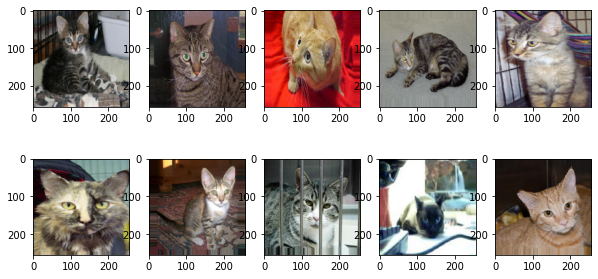

In [19]:
temp_data = ImageDataGenerator(zoom_range=0.2,)

plt.figure(figsize=(10,5))
show_generator_results(temp_data, 'cats', 10, 5, False)

Found 20 images belonging to 1 classes.


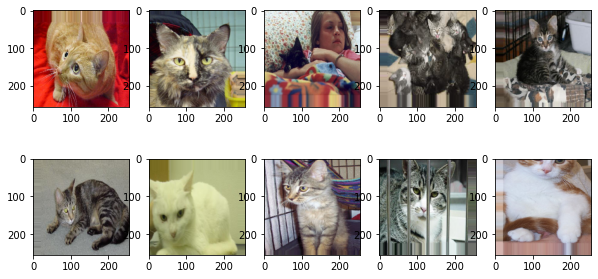

In [21]:
temp_data = ImageDataGenerator(height_shift_range=[-30,10],
                              width_shift_range=[0,20])
plt.figure(figsize=(10,5))
show_generator_results(temp_data, 'cats', 10, 5, False)

Found 20 images belonging to 1 classes.


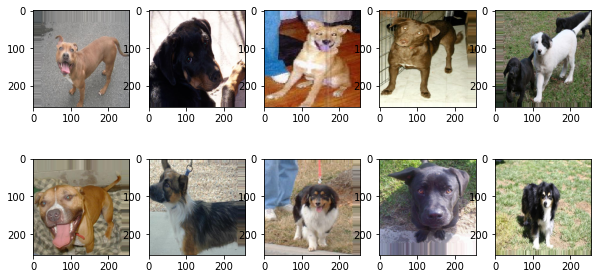

In [22]:
plt.figure(figsize=(10,5))
show_generator_results(temp_data, 'dogs', 10, 5, False)

Found 20 images belonging to 1 classes.


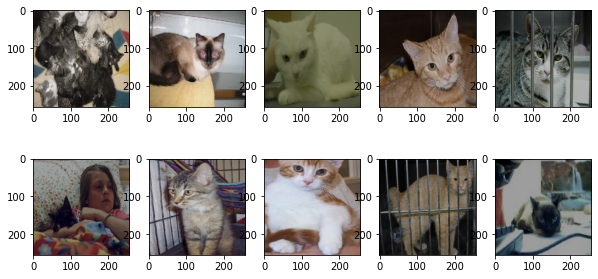

In [24]:
temp_data = ImageDataGenerator(shear_range=0.2,
                              brightness_range=[0.5,1])

plt.figure(figsize=(10,5))
show_generator_results(temp_data, 'cats', 10, 5, False)

Found 20 images belonging to 1 classes.


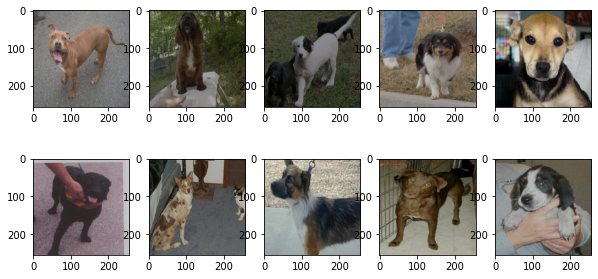

In [26]:
plt.figure(figsize=(10,5))
show_generator_results(temp_data, 'dogs', 10, 5, False)

In [27]:
train_img_gen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    height_shift_range=[-30,10],
                    width_shift_range=[0,20],
                    brightness_range=[0.5,1],
                  )

test_img_gen = ImageDataGenerator(rescale=1.0/255)

Found 20 images belonging to 1 classes.


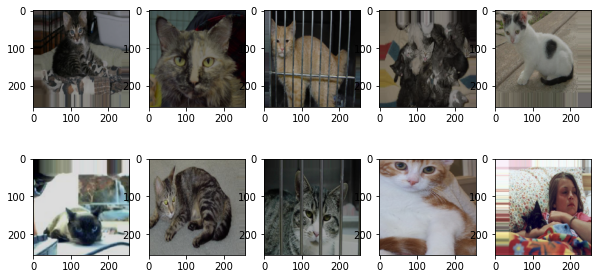

In [28]:
plt.figure(figsize=(10,5))
show_generator_results(train_img_gen, 'cats', 10, 5, True)

Found 20 images belonging to 1 classes.


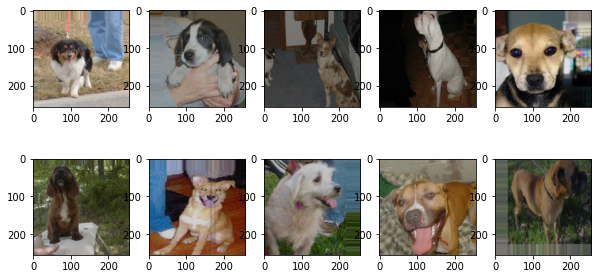

In [29]:
plt.figure(figsize=(10,5))
show_generator_results(train_img_gen, 'dogs', 10, 5, True)

In [30]:
train_data = train_img_gen.flow_from_directory('data/train',
                                               target_size=(img_size,img_size),
                                               classes=['cats','dogs'],
                                               batch_size=batch_size,
                                               seed=seed
                                              )

Found 40 images belonging to 2 classes.


In [31]:
test_data = test_img_gen.flow_from_directory('data/test/',
                                             target_size=(img_size,img_size),
                                             batch_size=10,
                                             classes=['cats','dogs'])

Found 20 images belonging to 2 classes.


# Model Building

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [33]:
model = Sequential()

# Convolutional layer 1 with 32 filters of kernel size[5,5], input shape=128x128x3, 
model.add(Conv2D(filters=32, 
                 kernel_size=(5,5), 
                 input_shape=(img_size, img_size, channels),
                 activation='relu'
                ))

# Pooling layer 1 with pool size[2,2] and stride 2 
model.add(MaxPooling2D(pool_size=(2,2), 
                       strides=2
                      ))

# Convolutional layer 2 with 64 filters of kernel size[5,5] 
model.add(Conv2D(filters=64,
                 kernel_size=(5,5),
                 activation='relu'
                ))

# Pooling layer 2 with pool size[2,2] and stride 2 
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2
                      ))

# Flatten Layer
model.add(Flatten())

# Dense layer 1 whose output size is fixed in the hyper parameter: fc_size=32 
model.add(Dense(32, activation='relu'))

# Dropout Layer
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'], 
             )

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 179776)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5752864   
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [36]:
history = model.fit_generator(train_data,
                    epochs=100,
                    validation_data=test_data,
                    steps_per_epoch=train_data.n//batch_size,
                    validation_steps=test_data.n//10,
                   )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
5/5 [==============================] - 4s 855ms/step - loss: 4.2831 - acc: 0.5000 - val_loss: 0.9719 - val_acc: 0.5000
Epoch 2/100
5/5 [==============================] - 4s 803ms/step - loss: 0.8024 - acc: 0.5000 - val_loss: 0.7381 - val_acc: 0.3500
Epoch 3/100
5/5 [==============================] - 4s 798ms/step - loss: 0.7178 - acc: 0.4750 - val_loss: 0.7178 - val_acc: 0.5500
Epoch 4/100
5/5 [==============================] - 4s 802ms/step - loss: 0.7391 - acc: 0.4750 - val_loss: 0.6827 - val_acc: 0.6000
Epoch 5/100
5/5 [==============================] - 4s 800ms/step - loss: 0.6879 - acc: 0.4750 - val_loss: 0.6850 - val_acc: 0.6000
Epoch 6/100
5/5 [==============================] - 4s 825ms/step - loss: 0.6884 - acc: 0.4500 - val_loss: 0.6804 - val_acc: 0.4500
Epoch 7/100
5/5 [==============================] - 4s 802ms/step - loss: 0.6861 - acc: 0.5000 - val_loss: 0.6783 - val_acc: 0.5000
Epoch 8

# Evaluation

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Text(0.5, 1.0, 'Training and Validation Acc')

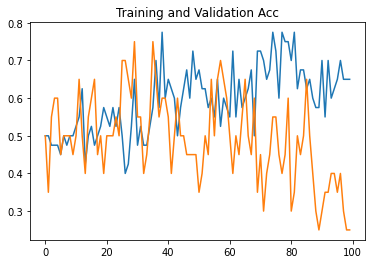

In [38]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Acc')

Text(0.5, 1.0, 'Training and Validation Loss')

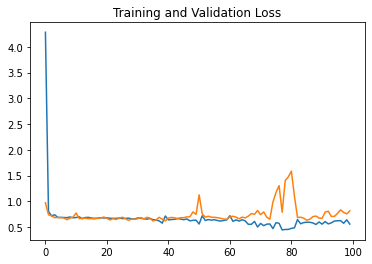

In [39]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation Loss')

In [40]:
_, acc = model.evaluate_generator(test_data, steps=test_data.n, verbose=0)
print('> %.3f' % (acc * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
> 40.000


In [42]:
history = model.fit_generator(train_data,
                    epochs=200,
                    validation_data=test_data,
                    steps_per_epoch=train_data.n//batch_size,
                    validation_steps=test_data.n//10,
                   )

Epoch 1/200
5/5 [==============================] - 4s 786ms/step - loss: 0.5436 - acc: 0.7000 - val_loss: 0.8035 - val_acc: 0.2500
Epoch 2/200
5/5 [==============================] - 4s 792ms/step - loss: 0.5300 - acc: 0.6500 - val_loss: 0.7853 - val_acc: 0.4000
Epoch 3/200
5/5 [==============================] - 4s 795ms/step - loss: 0.5177 - acc: 0.7250 - val_loss: 0.8421 - val_acc: 0.4000
Epoch 4/200
5/5 [==============================] - 4s 798ms/step - loss: 0.4983 - acc: 0.7000 - val_loss: 0.8133 - val_acc: 0.4000
Epoch 5/200
5/5 [==============================] - 4s 797ms/step - loss: 0.4447 - acc: 0.7500 - val_loss: 0.7752 - val_acc: 0.4500
Epoch 6/200
5/5 [==============================] - 4s 800ms/step - loss: 0.6241 - acc: 0.6500 - val_loss: 0.8204 - val_acc: 0.4000
Epoch 7/200
5/5 [==============================] - 4s 800ms/step - loss: 0.4955 - acc: 0.7000 - val_loss: 0.9596 - val_acc: 0.3500
Epoch 8/200
5/5 [==============================] - 4s 811ms/step - loss: 0.6336 - a

Text(0.5, 1.0, 'Training and Validation Acc')

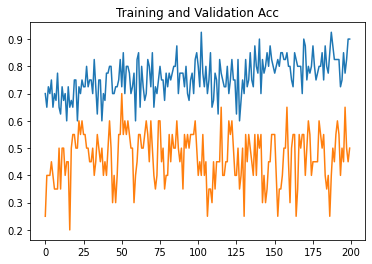

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Acc')


Text(0.5, 1.0, 'Training and Validation Loss')

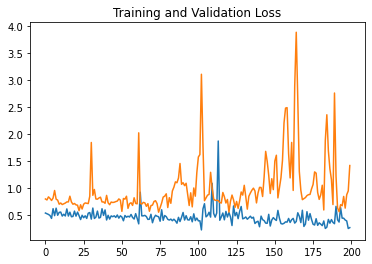

In [45]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation Loss')

In [46]:
_, acc = model.evaluate_generator(test_data, steps=test_data.n, verbose=0)
print('> %.3f' % (acc * 100.0))

> 51.000


In [47]:
history = model.fit_generator(train_data,
                    epochs=300,
                    validation_data=test_data,
                    steps_per_epoch=train_data.n//batch_size,
                    validation_steps=test_data.n//10,
                   )

Epoch 1/300
5/5 [==============================] - 4s 794ms/step - loss: 0.2811 - acc: 0.8500 - val_loss: 1.6304 - val_acc: 0.5000
Epoch 2/300
5/5 [==============================] - 4s 781ms/step - loss: 0.2649 - acc: 0.8750 - val_loss: 1.7160 - val_acc: 0.5000
Epoch 3/300
5/5 [==============================] - 4s 795ms/step - loss: 0.3566 - acc: 0.8500 - val_loss: 2.1082 - val_acc: 0.4500
Epoch 4/300
5/5 [==============================] - 4s 779ms/step - loss: 0.1647 - acc: 0.9250 - val_loss: 2.2792 - val_acc: 0.5000
Epoch 5/300
5/5 [==============================] - 4s 784ms/step - loss: 0.4824 - acc: 0.9000 - val_loss: 4.5935 - val_acc: 0.6500
Epoch 6/300
5/5 [==============================] - 4s 781ms/step - loss: 0.3536 - acc: 0.8000 - val_loss: 4.0645 - val_acc: 0.6000
Epoch 7/300
5/5 [==============================] - 4s 779ms/step - loss: 0.4735 - acc: 0.7500 - val_loss: 0.8593 - val_acc: 0.4000
Epoch 8/300
5/5 [==============================] - 4s 801ms/step - loss: 0.3203 - a

Text(0.5, 1.0, 'Training and Validation Acc')

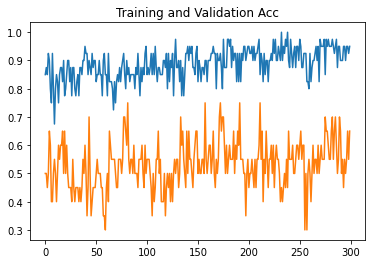

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Acc')

Text(0.5, 1.0, 'Training and Validation Loss')

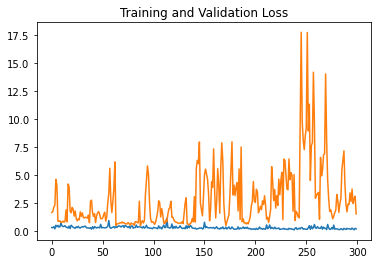

In [49]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation Loss')

In [50]:
_, acc = model.evaluate_generator(test_data, steps=test_data.n, verbose=0)
print('> %.3f' % (acc * 100.0))

> 60.000
